# 다항 회귀 이해

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [2]:
# [[0, 1], [2, 3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2, 2)
X

array([[0, 1],
       [2, 3]])

In [3]:
# PolynomialFeatures를 이용하여 2차 다항식으로 변환
# degree=2일 때 : 1, x1, x2, x1^2, x1x2, x2^2
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly.transform(X)

array([[1., 0., 1., 0., 0., 1.],
       [1., 2., 3., 4., 6., 9.]])

# 다항 회귀를 이용한 과소적합 및 과적합 이해

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')

In [5]:
# 임의의 X -> 코사인 변환 값 반환
def true_fun(X):
    return np.cos(1.5*np.pi*X)

# X : 0에서 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y : 코사인 기반의 true_fun()에서 약간의 노이즈 추가
y = true_fun(X) + np.random.randn(n_samples)*0.1

print(X)
print(y)

[0.0202184  0.07103606 0.0871293  0.11827443 0.14335329 0.38344152
 0.41466194 0.4236548  0.43758721 0.46147936 0.52184832 0.52889492
 0.54488318 0.5488135  0.56804456 0.60276338 0.63992102 0.64589411
 0.71518937 0.77815675 0.78052918 0.79172504 0.79915856 0.83261985
 0.87001215 0.891773   0.92559664 0.94466892 0.96366276 0.97861834]
[ 1.0819082   0.87027612  1.14386208  0.70322051  0.78494746 -0.25265944
 -0.22066063 -0.26595867 -0.4562644  -0.53001927 -0.86481449 -0.99462675
 -0.87458603 -0.83407054 -0.77090649 -0.83476183 -1.03080067 -1.02544303
 -1.0788268  -1.00713288 -1.03009698 -0.63623922 -0.86230652 -0.75328767
 -0.70023795 -0.41043495 -0.50486767 -0.27907117 -0.25994628 -0.06189804]



Degree 1 회귀 계수 : [-1.61]
Degree 1 MSE : 0.40772896250986834

Degree 2 회귀 계수 : [-7.32  5.56]
Degree 2 MSE : 0.058184371207478124

Degree 4 회귀 계수 : [  0.47 -17.79  23.59  -7.26]
Degree 4 MSE : 0.043208749872317556

Degree 8 회귀 계수 : [ 1.73000e+00 -6.07800e+01  3.65580e+02 -1.20069e+03  2.15422e+03
 -2.08993e+03  1.02824e+03 -1.99390e+02]
Degree 8 MSE : 0.36031997158934465

Degree 16 회귀 계수 : [-3.91174000e+03  1.40626630e+05 -2.64361072e+06  3.02194277e+07
 -2.27970275e+08  1.19434160e+09 -4.49440191e+09  1.24173393e+10
 -2.55093669e+10  3.91367190e+10 -4.46539127e+10  3.73420461e+10
 -2.22243624e+10  8.91114685e+09 -2.15759038e+09  2.38299107e+08]
Degree 16 MSE : 12785516306.501621


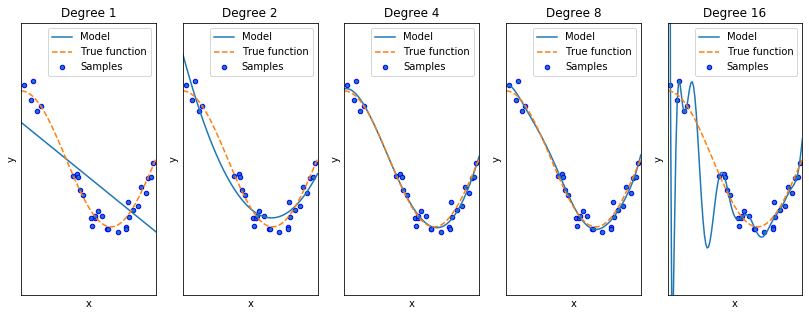

In [6]:
plt.figure(figsize=(14,5))
degrees = [1, 2, 4, 8, 16]

# 다항 회귀 차수(degree) 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    # Polynomial 변환
    # include_bias=False : 다항식 만들 때 1열에 있는 1 값이 사라진다
    polynomial_featrues = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    # 파이프라인 : 리스트 안 튜플(이름, 생성된 객체), 순서대로 처리
    pipeline = Pipeline([('polynomial_features', polynomial_featrues),
                         ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print("\nDegree {0} 회귀 계수 : {1}".format(degrees[i], np.round(coefficients,2)))
    print("Degree {0} MSE : {1}".format(degrees[i], -1*np.mean(scores)))
    
    # 데이터 세트를 100개로 나누어 예측 수행
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]),label='Model')
    # newaxis : 길이가 1인 새로운 축을 추가할 때 사용
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label='True function')
    plt.scatter(X, y, edgecolor='b',s=20, label='Samples')
    
    plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc='best')
    plt.title("Degree {0}".format(degrees[i]))
    
plt.show()